# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get unique 'Mouse ID' values from duplicates using set comprehension
duplicate_mouse_ids = list({x for x in duplicate_mice['Mouse ID']})

# Print the result as a list
print(duplicate_mouse_ids)


['g989']


In [20]:
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDataframe= merged_df['Mouse ID'] == 'g989'
clean_df = merged_df[~cleanDataframe]

In [31]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = len(clean_df["Mouse ID"].unique())
num_unique_mice

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = grouped.mean()
median = grouped.median()
variance = grouped.var()
std_dev = grouped.std()
sem = grouped.sem()
# Assemble the resulting series into a single summary DataFrame.
# Rename the columns for clarity
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Var': variance,
    'Std': std_dev,
    'SEM': sem
})
# Display the summary statistics table
print(summary_df)

                   Mean     Median        Var       Std       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

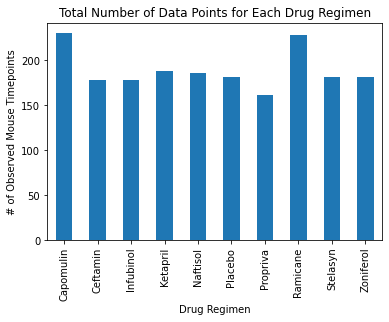

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = merged_df.groupby('Drug Regimen')['Mouse ID'].count()
drug_regimen_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Data Points for Each Drug Regimen')
plt.show()

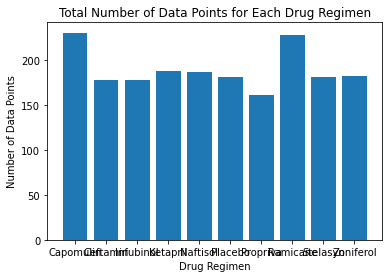

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import pandas as pd
import matplotlib.pyplot as plt


drug_regimen_counts = merged_df.groupby('Drug Regimen')['Mouse ID'].count()


regimens = drug_regimen_counts.index.tolist()
counts = drug_regimen_counts.values


plt.bar(regimens, counts)


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Drug Regimen')

# Displaying the plot
plt.show()


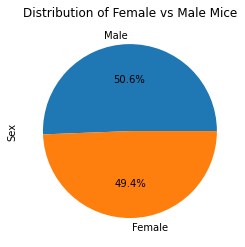

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd

# Assuming your DataFrame is named df and it has a column 'Sex' for gender

# Counting the number of occurrences of each gender
gender_distribution = merged_df['Sex'].value_counts()

# Generating the pie plot
gender_distribution.plot(kind='pie', autopct='%1.1f%%')

# Adding a title
plt.title('Distribution of Female vs Male Mice')

# Showing the plot
plt.show()


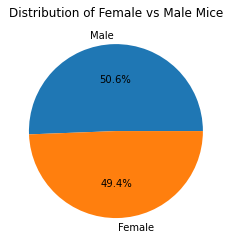

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = merged_df['Sex'].value_counts()


labels = gender_counts.index
sizes = gender_counts.values


plt.pie(sizes, labels=labels, autopct='%1.1f%%')


plt.title('Distribution of Female vs Male Mice')


plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged1_df = last_timepoint.merge(merged_df, on=['Mouse ID', 'Timepoint'], how='left')


In [68]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merged1_df[merged1_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

    # Print the analysis
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


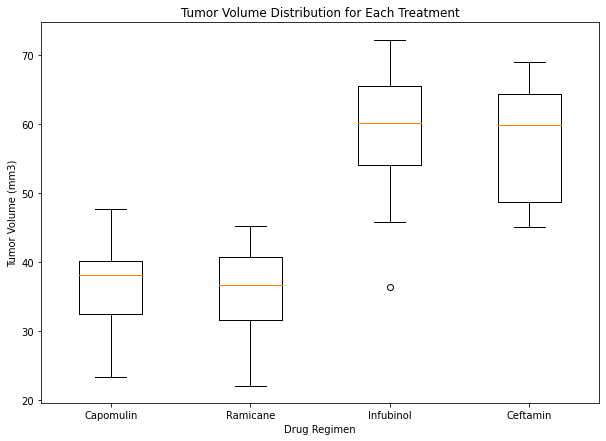

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 7))


plt.boxplot(tumor_vol_data, labels=treatments)


plt.title('Tumor Volume Distribution for Each Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')


plt.show()

## Line and Scatter Plots

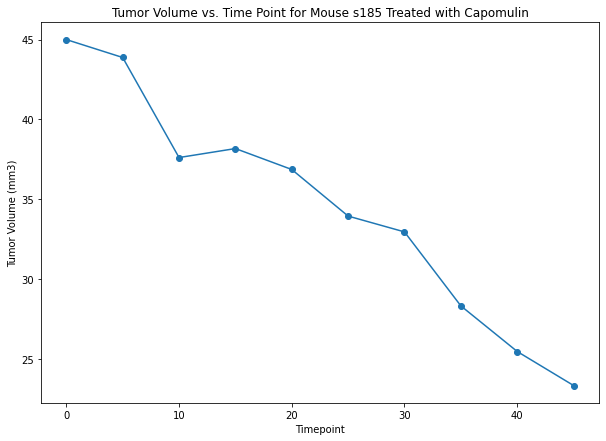

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(10, 7))
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Select a specific mouse ID treated with Capomulin
# Replace 'mouse_id_here' with the actual mouse ID
mouse_id = 's185'
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Plotting tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Adding labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Displaying the plot
plt.show()

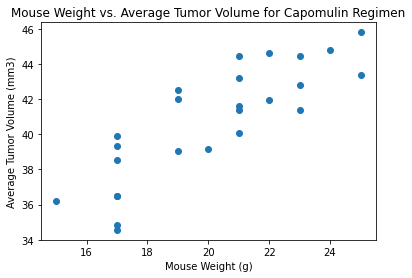

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']


average_tumor_vol = capomulin_df.groupby('Mouse ID').agg(Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'))


mouse_weight = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_vol, mouse_weight, on='Mouse ID')


plt.scatter(merged_data['Weight (g)'], merged_data['Avg_Tumor_Volume'])


plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')


plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.84


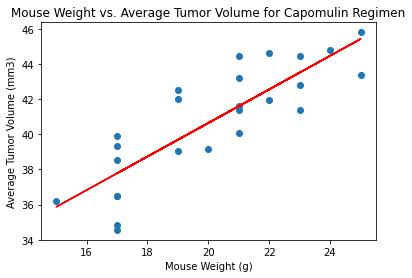

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(merged_data['Weight (g)'], merged_data['Avg_Tumor_Volume'])[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['Weight (g)'], merged_data['Avg_Tumor_Volume'])

regress_values = merged_data['Weight (g)'] * slope + intercept

plt.scatter(merged_data['Weight (g)'], merged_data['Avg_Tumor_Volume'])


plt.plot(merged_data['Weight (g)'], regress_values, "r-")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()